In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,models, layers
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train=X_train.reshape(-1,28,28,1)

In [6]:
X_test=X_test.reshape(-1,28,28,1)

## Data Preprocessing 

In [7]:
X_train=X_train/255
X_test=X_test/255

## Building CNN Model

In [8]:
cnn=models.Sequential(
[
layers.Conv2D(30,(3,3),activation='relu', input_shape=(28, 28, 1)),
layers.MaxPooling2D((2,2)),
layers.Flatten(),
layers.Dense(100, activation='relu'),
keras.layers.Dense(10, activation='sigmoid')
])

In [9]:
cnn.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [10]:
cnn.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3098 - accuracy: 0.9062
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0604 - accuracy: 0.98200s - loss: 0.0606 - 
Epoch 3/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0338 - accuracy: 0.9899
Epoch 4/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0230 - accuracy: 0.9927
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0136 - accuracy: 0.9957


In [11]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0537 - accuracy: 0.9835


[0.05374044179916382, 0.9835000038146973]

In [12]:
y_pred=cnn.predict(X_test)

In [14]:
y_predicted=[np.argmax(element) for element in y_pred]
y_predicted[:5]

[7, 2, 1, 0, 4]

## Building a Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_predicted)
accuracy_score(y_test,y_predicted)

0.9836

Text(69.0, 0.5, 'Truth')

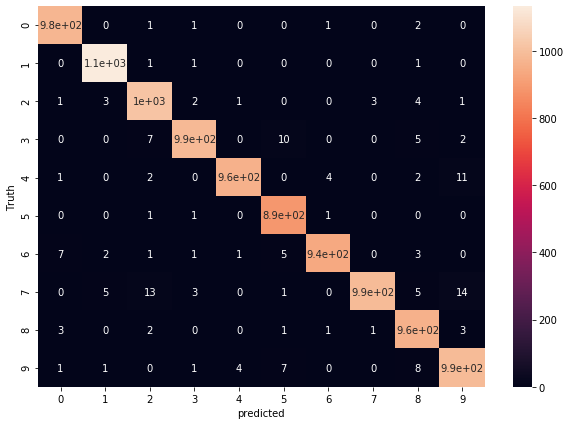

In [16]:
import seaborn as sn 
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

## Predicting the Results

In [17]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [18]:
y_predicted[:5]

[7, 2, 1, 0, 4]